# Intro 
- Tensorflow =  tensor + flow 
- Tensor = matrixs in general forms (1D (dimension),2D...N-D of data sets)
- flow   = data pipeline 

##### Via the linear computation pipeline of tensors, A deep learning model can be built 

Similiar as Numpy, Tensorflow using matrix ways dealing with data procrocess. The thing should be noticed is :  every element/variable/method should be declared via Tensorflow method first then  they can be implemented in Tensorflow workflow.

- e.g. x =  tf.constant(1)


# Basic objects  

    - Constant 
    - Variable 
    - Session
    - Tensor
    - Placeholder 
    - Activation 
    
# Basic framework of ML model 
  ##### Y = a*X + b 
  - X = input  
  - a = slope
  - b = intercept
  - Y = prediction output 
  

In [130]:
# import analysis library
import pandas as pd, numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


## 1) Constant 

In [2]:
a = tf.constant(42)
b = tf.constant(2)
c = tf.constant([1,2,3])

In [3]:
a

<tf.Tensor 'Const:0' shape=() dtype=int32>

In [4]:
c

<tf.Tensor 'Const_2:0' shape=(3,) dtype=int32>

In [5]:
type(a)

tensorflow.python.framework.ops.Tensor

## 2) Variable

In [6]:
x = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0))

In [7]:
x

<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32_ref>

In [8]:
type(x)

tensorflow.python.ops.variables.Variable

## 3) Session

- A object that make elements in Tensowflow are executed
- 2 ways run session


In [9]:
a = tf.constant(42)
b = tf.constant(2)

In [10]:
# 1st way run session 
sess = tf.Session()
print(sess.run(a))

42


In [11]:
print(sess.run(a+b))

44


In [12]:
# 2nd  way run session 

with tf.Session() as sess:
    sess.run(a)
    print (sess.run(a))
    # to release the resources if session is no longer used  
    sess.close()

42


## 4) Tensor 

In [15]:
# more constant (tensor) demo 

# fixed tenfors 
zero_tsr = tf.zeros([2, 5])
ones_tsr = tf.ones([3, 3])
filled_tsr = tf.fill([4, 4], 42)
constant_tsr = tf.constant([1,2,3])


# initialize variables based on the shape of other tensors
zeros_similar = tf.zeros_like(constant_tsr)

In [19]:
sess = tf.Session()

print(sess.run(zero_tsr))
print ('')
print(sess.run(ones_tsr))
print ('')
print(sess.run(filled_tsr))
print ('')
print(sess.run(constant_tsr))
print ('')
print(sess.run(zeros_similar))

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]

[[42 42 42 42]
 [42 42 42 42]
 [42 42 42 42]
 [42 42 42 42]]

[1 2 3]

[0 0 0]


In [17]:
# similar as Numpy, Tensorflow support defined intervals tensors 

# linspace 
linear_tsr = tf.linspace(10.0, 12.0, 3, name="linspace")
linear_tsr2 = tf.linspace(10.0, 12.0, 10, name="linspace")
# range 
integer_seq_tsr = tf.range(start=6, limit=15, delta=3)
# random 
randunif_tsr = tf.random_uniform([2, 3],minval=0, maxval=1)
# random normal distribution 
randnorm_tsr = tf.random_normal([2, 3],mean=0.0, stddev=1.0)
# random normal distribution  with certain bound 
runcnorm_tsr2 = tf.truncated_normal([2, 3], mean=0.0, stddev=1.0)

In [20]:
sess = tf.Session()
print(sess.run(linear_tsr))
print ('')
print(sess.run(linear_tsr2))
print ('')
print(sess.run(integer_seq_tsr))
print ('')
print(sess.run(randunif_tsr))
print ('')
print(sess.run(randnorm_tsr))
print ('')
print(sess.run(runcnorm_tsr2))
print ('')

[ 10.  11.  12.]

[ 10.          10.22222233  10.44444466  10.66666698  10.88888931
  11.11111069  11.33333302  11.55555534  11.77777767  12.        ]

[ 6  9 12]

[[ 0.68589759  0.00293875  0.95540321]
 [ 0.01091421  0.06744373  0.58562887]]

[[-0.62170088  0.25611123 -1.9105767 ]
 [-0.01142266  0.01355113 -0.60764706]]

[[-0.93455225 -0.45197982  1.40479243]
 [-0.66926003 -0.21295108  0.37870347]]



In [37]:
# some other tensor operationexamples 

identity_matrix = tf.diag([1.0, 1.0, 1.0])
A = tf.truncated_normal([2, 3])
B = tf.fill([2,3], 5.0)
C = tf.random_uniform([3,3])
D = tf.convert_to_tensor(np.array([[1., 2., 3.],[-3., -7.,
-1.],[0., 5., -2.]]))

In [44]:
print (sess.run(identity_matrix))
print ('')
print (sess.run(A))
print ('')
print (sess.run(B))
print ('')
print (sess.run(C))
print ('')
print (sess.run(D))

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]

[[ 1.10964024  0.499006   -0.31502435]
 [ 0.36672869 -0.06131192  1.40994954]]

[[ 5.  5.  5.]
 [ 5.  5.  5.]]

[[ 0.90565217  0.59094918  0.10770488]
 [ 0.76289606  0.18972147  0.48293424]
 [ 0.9826057   0.62176013  0.56320763]]

[[ 1.  2.  3.]
 [-3. -7. -1.]
 [ 0.  5. -2.]]


In [40]:
# addition
print (sess.run(A+B))

[[ 5.12496424  4.00969362  5.30144644]
 [ 5.23104382  4.93098402  5.04328346]]


In [41]:
# subtraction
print (sess.run(A-A))

[[ 0.  0.  0.]
 [ 0.  0.  0.]]


In [42]:
# Multiplication
print(sess.run(tf.matmul(B, identity_matrix)))

[[ 5.  5.  5.]
 [ 5.  5.  5.]]


In [45]:
# transpose
print(sess.run(tf.transpose(C)))

[[ 0.86980426  0.37087607  0.82157695]
 [ 0.75118864  0.70828462  0.0340637 ]
 [ 0.7207917   0.45695841  0.60118389]]


In [48]:
# subtraction
print (sess.run(A))

[[-0.59021014 -0.61193705  1.52064621]
 [-0.18495844 -1.01657403 -0.36803964]]


In [56]:
# determinant
print(sess.run(tf.matrix_determinant(D)))

-38.0


In [52]:
# inverse 
print(sess.run(tf.matrix_inverse(D)))

[[-0.5        -0.5        -0.5       ]
 [ 0.15789474  0.05263158  0.21052632]
 [ 0.39473684  0.13157895  0.02631579]]


In [69]:
### eigenvalue 
print(sess.run(tf.self_adjoint_eig(D)[0]))

[-10.65907521  -0.22750691   2.88658212]


In [70]:
### eigenvectors 
print(sess.run(tf.self_adjoint_eig(D))[1])

[[ 0.21749542  0.63250104 -0.74339638]
 [ 0.84526515  0.2587998   0.46749277]
 [-0.4880805   0.73004459  0.47834331]]


In [75]:
# divide
print(sess.run(tf.div(3,4)))
print(sess.run(tf.truediv(3,4)))
print(sess.run(tf.floordiv(3.0,4.0)))

# mod 
print(sess.run(tf.mod(22.0, 5.0)))

0
0.75
0.0
2.0


In [79]:
# other examples :
# https://www.tensorflow.org/api_docs/python/tf/subtract
# Returns x - y element-wise.

def custom_polynomial(value):
    return(tf.subtract(3 * tf.square(value), value) + 10)

print(sess.run(custom_polynomial(11)))

362


## 5) Placeholder
- Placeholders is the object that allow you to feed in
  data of a specific type and shape and depend on the results of the 
  computational graph, such as the expected outcome of a computation.

In [21]:
# placeholder
x1 = tf.placeholder(tf.float32, shape=(3, 3))

# tf.matmul : x1 * x1 
y1 = tf.matmul(x1, x1)

# tf.matmul : y = tf.identity(x1), => y = x1 
y = tf.identity(x1)

In [22]:
rand_array = np.random.rand(3, 3)

print(sess.run(y1, feed_dict={x1: rand_array}))
print ('')
print(sess.run(y, feed_dict={x1: rand_array}))

[[ 1.21436167  1.67842686  0.98959279]
 [ 1.57466221  1.69208622  1.32458973]
 [ 1.07482791  1.03398573  0.72431445]]

[[ 0.70636511  0.5127427   0.92491919]
 [ 0.917032    0.86615187  0.50021511]
 [ 0.26511338  0.94292593  0.08625676]]


In [36]:
(sess.run(B-B))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]], dtype=float32)

In [29]:
sess.run(D)

array([[ 1.,  2.,  3.],
       [-3., -7., -1.],
       [ 0.,  5., -2.]])

## 6) Activation
- The goal of the *** activation function*** is to adjust weight and bias.

- In TensorFlow, activation functions are non-linear
operations that act on tensors. They are functions that operate in a similar way to the previous
mathematical operations.

- Activation functions serve many purposes, but a few main concepts
is that they ***introduce a non-linearity***  into the graph while normalizing the outputs

- The activation functions live in *** the neural network (nn) library*** in TensorFlow

In [80]:
# relu
print(sess.run(tf.nn.relu([-3., 3., 10.])))

[  0.   3.  10.]


In [81]:
# relu6
print(sess.run(tf.nn.relu6([-3., 3., 10.])))

[ 0.  3.  6.]


In [82]:
# sigmoid
print(sess.run(tf.nn.sigmoid([-1., 0., 1.])))

[ 0.26894143  0.5         0.7310586 ]


In [83]:
# hyper tangent
print(sess.run(tf.nn.tanh([-1., 0., 1.])))

[-0.76159418  0.          0.76159418]


In [84]:
# softsign
print(sess.run(tf.nn.softsign([-1., 0., -1.])))

[-0.5  0.  -0.5]


In [85]:
# softplus
print(sess.run(tf.nn.softplus([-1., 0., -1.])))

[ 0.31326166  0.69314718  0.31326166]


In [87]:
# Exponential Linear Unit (ELU)
print(sess.run(tf.nn.elu([-1., 0., -1.])))

[-0.63212055  0.         -0.63212055]


In [120]:
# simple comparision 
xx = [-5.,-4.,-3.,-2.,-1.,0.,1.,2.,3.,4.,5.]
elu_output=[]
relu_output=[]
softplus_output=[]


for k in xx:
    elu_output.append(sess.run(tf.nn.elu(k)))
    relu_output.append(sess.run(tf.nn.relu(k)))
    softplus_output.append(sess.run(tf.nn.softplus(k)))


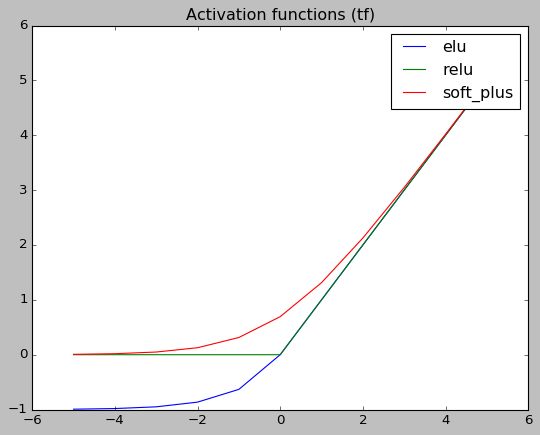

In [136]:
# print(plt.style.available)
plt.style.use('classic')


plt.plot(xx, elu_output)
plt.plot(xx, relu_output)
plt.plot(xx, softplus_output)
plt.legend(['elu','relu','soft_plus'])
plt.title('Activation functions (tf)')